# Exploratory Data Analysis on the Tips Dataset

**Author:** Taylor Martin

**Date:** October 2nd, 2025

**Purpose:** Perform exploratory data analysis (EDA) on the Tips dataset using pandas and Seaborn.

### 1. Imports



In the import steps I setup the notebook to work with data by importing pandas, create plot by importing seaborn, and enable plot controles by importing matplotlib.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib

from matplotlib.axes import Axes

### 2. Data Acquistion

In the Data Acquistion step we load the well known Tips Dataset into the notebook, generate a list of the columns included in the dataset, and a sample of the first 5 rows of the dataset.

In [23]:
# Load the Tips dataset into pandas
tips_df: pd.DataFrame = sns.load_dataset('tips')

# List column names
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [24]:
# Inspect first rows of the DataFrame
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3. Initial Data Inspection

In the Initial Data Inspection we see what the data looks like, how big it is, what type of values the dataset contains and if there are any missing values.

In [25]:
# Specify the number of rows to display
print(tips_df.head(10))

#Inspect the shape of the DataFrame with shape attribute
print(tips_df.shape)

# Inspect the data types of the columns with dtypes attribute
print(tips_df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [26]:
# Inspect the data types of the columns with info() method
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 4. Initial Descriptive Statistics

In the Initial Descriptive Statistics step we summarize the complete dataset by generating the count, mean, std, min, 25%, 50%, 75% and max statistics for each numerical column.

In [27]:
# Inspect summary statistics for numerical columns
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The average total bill is about $19.79, while the average tip is around $3.00. This makes the average tip percentage of the dataset a little over 15%. The average tip percentage is generally considered to be between 15% and 20% which the dataset falls into.

### 5a. Initial Data Distribution for Numerical Columns

The Initial Data Distribution step creates visualizations for each numerical column.

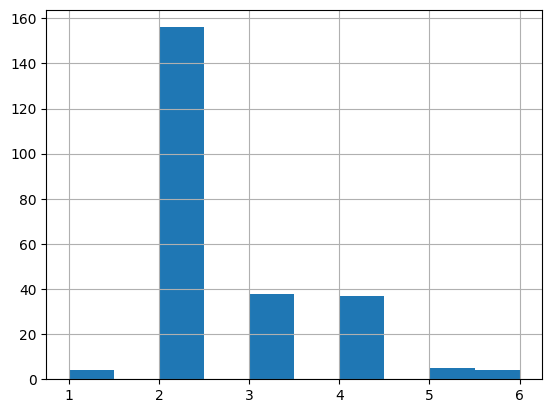

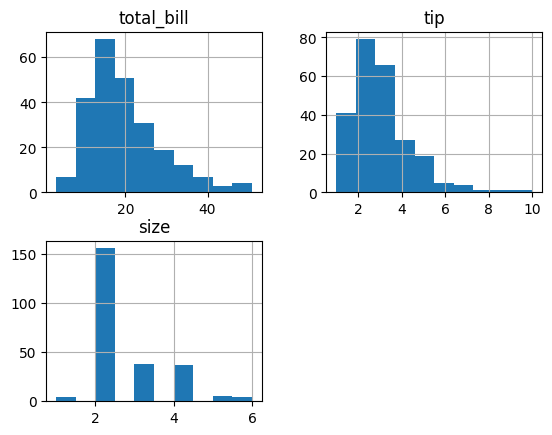

In [28]:
# Inspect histogram by numerical column
tips_df['size'].hist()

# Inspect histograms for all numerical columns
tips_df.hist()

# Show all plots
matplotlib.pyplot.show()

**OBSERVATION:** Both the Total Bill and Tip charts are *right skewed* with most bills falling around **$15-$20** and most tips falling between **$2-$3**. Most dining group were 2 people with tables of 1 or groups of 5 or more being a rare occurance.

### 5b. Initial Data Distribution for Categorical Columns

The Initial Data Distribution step creates visulatizations based on categorical columns.

In [29]:
# Inspect value counts by categorical column
tips_df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

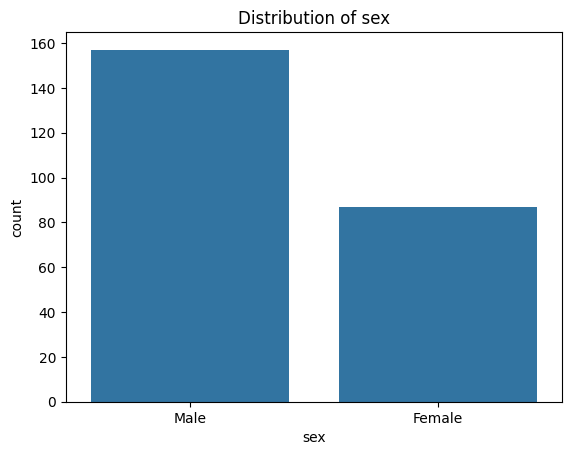

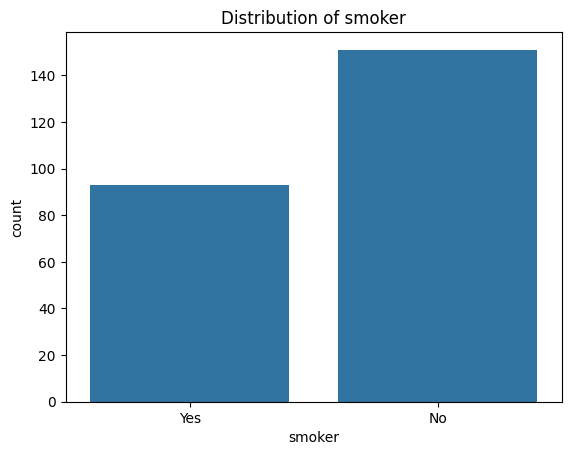

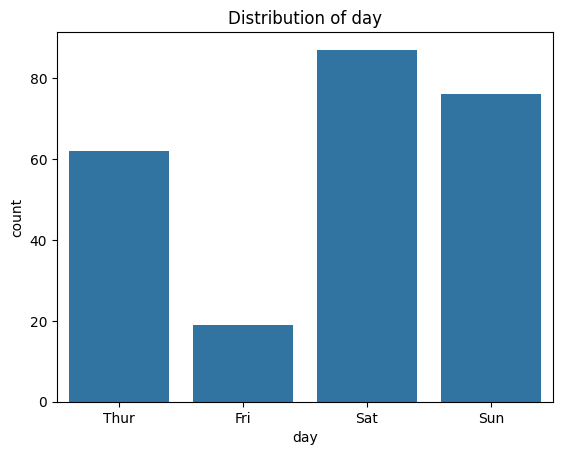

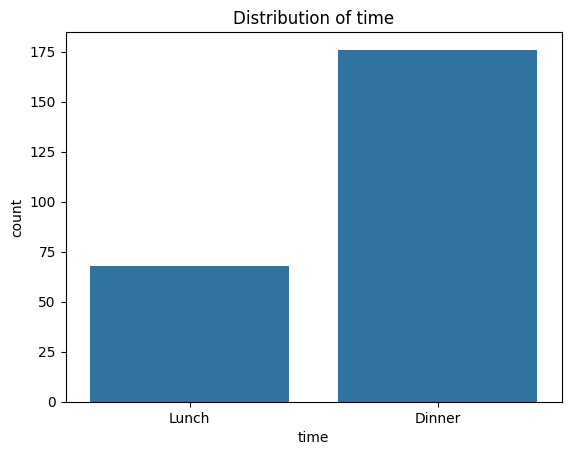

In [30]:
# Inspect value counts for all categorical columns
for col in tips_df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=tips_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

**OBSERVATION:** Most of the bill payers were *non smokers* and most dined during *dinner*. Significantly more bill payers dined during the *weekend* than they did during the week with the fewest diners on Friday.

### 6. Initial Data Transformation and Feature Engineering

The Initial Data Transformation and Feature Engineering step allows for columns to be updated and new columns to be added; specifically the Tip Percentage (tip/total bill).

In [31]:
# Renaming a column
tips_df.rename(columns={'total_bill': 'Total Bill'}, inplace=True)

# Adding a new column
tips_df['Tip Percentage'] = (tips_df['tip'] / tips_df['Total Bill']) * 100

# Display renamed column and new column
tips_df.head()

,Total Bill,tip,sex,smoker,day,time,size,Tip Percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### 7. Initial Visualizations

In the Initial Visualizations I create 3 different plots to showcase different aspects of the Tips Dataset.

**7a. Tip vs. Total Bill**

1. Goal: To understand general tipping behavior, spot potential outliers and identify any correlation between the bill and the tip left.
2. I chose a *scatterplot* to attempt to achieve my goal.
3. Chart:

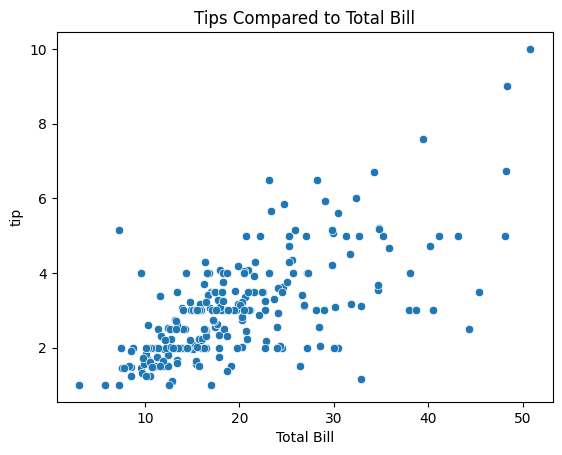

In [43]:
sns.scatterplot(tips_df, x="Total Bill",y="tip")
matplotlib.pyplot.title('Tips Compared to Total Bill')
matplotlib.pyplot.show()


4. Story: There is a pretty strong **positive correlation** between the Total Bill and the tip amount. As the bill increases generally you will see the tip increase. There are **several outliers** with some tipping signficantly more than their bill would expect and some severely less.

**7b. Distribution of Tip Amount by Day of the Week**

1. Goal: To identify potential patterns or consistency across the days of the week, or see if any days have more variability in tipping behavior. 
2. I chose a *violin plot* to attempt to achieve my goal.
3. Chart:

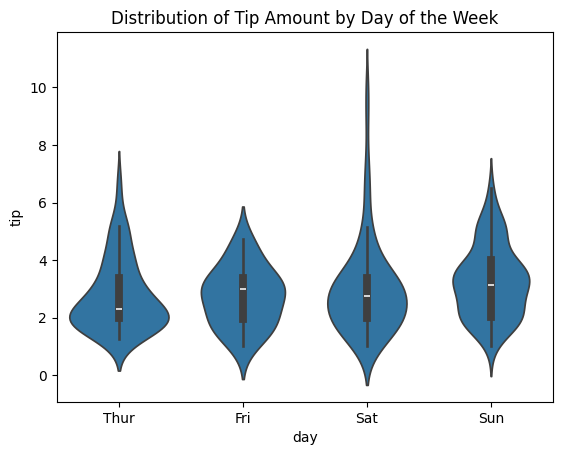

In [45]:
sns.violinplot(tips_df, x="day", y="tip")
matplotlib.pyplot.title('Distribution of Tip Amount by Day of the Week')
matplotlib.pyplot.show()


4. Story: For each day most tips cluster between **$2.00-$4.00** with **Saturday** having the **widest** spread of tips and **Friday** having the **narrowest** spread. 

**7c. Facet Grid of Total Bill vs. Tip**

1. Goal: To understand tipping behavior, spot potential outliers and identify any correlation between the bill and the tip left dependent on a combination of specific variables: time (either Lunch or Dinner) and whether or not the bill payer was a smoker.
2. I chose a *Facet Grid of Scatterplots* to attempt to achieve my goal.
3. Chart:

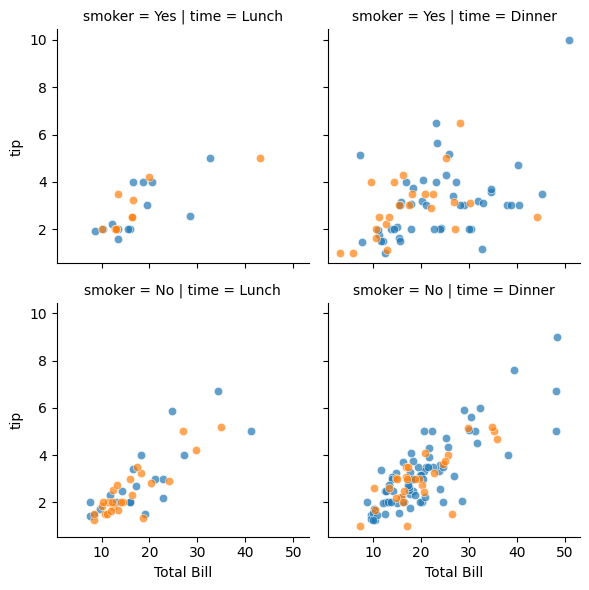

In [48]:
g = sns.FacetGrid(tips_df, col="time", row="smoker", hue="sex")
g.map(sns.scatterplot, "Total Bill", "tip", alpha=.7)

4. Story: There were less smokers that went for Lunch and Dinner comparatively to nonsmokers. There is no clear correlation for the Smoker/Lunch and Smoker/Dinner plots. While there is a clear positive correlation for the NonSmoker/Lunch and NonSmoker/Dinner plots. The strongest relationship between the total bill and tip is for the Nonsmokers/Dinner plot.

### 8. Initial Insights

Based on the above tables and visuals the following insights can be made:
- Most bill payers dined during dinner on the weekend.
- The average tip percentage falls right in with the expected average of 15%-20%.
- Nonsmokers were more likely to increase their tip amount as their bill increased compared to smokers. Most days had a very similar spread of tips cluster between $2.00-$4.00.